<a href="https://colab.research.google.com/github/phi330/special1/blob/main/trytry_%E5%8F%B0%E5%8C%97%E5%B8%82%E9%91%91%E5%AE%9A%E5%AE%89%E7%BD%AE%E7%B3%BB%E7%B5%B1%E6%89%B9%E9%87%8F%E6%9F%A5%E8%A9%A2%E9%91%91%E5%AE%9A%E5%88%B0%E6%9C%9F%E5%B9%B4%E9%99%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用方法：
先把這一份檔案建立副本，點選上方的檔案－在雲端硬碟中儲存副本，接下來都用副本編輯。<br>

把剛才存好的副本打開後，把下方程式碼有出現

`# -------------------注意更改`
行列內容改掉，<br>
假設:有一間台北市的學校帳號是111111，密碼是222222，<br>
也已經做好了一個預定要查詢學生的excel檔(.xlsx) 叫做"search.xlsx"<br>
預計要把查出來的檔存成一個新的檔 叫做"查詢結果.xlsx"
在看到下方這些列的時候：

```
user.send_keys("把這個位置改成鑑定安置系統帳號")       #-------------------注意更改
password.send_keys("把這個位置改成鑑定安置系統密碼")     #-------------------注意更改

sheet0 = pd.read_excel(io="把這裡改成要讀進去的檔名.xlsx", sheet_name="工作表1", usecols=["學生ID"]) #-------------------注意更改
wb.save('把這裡改成全部查完後要存檔的檔名.xlsx')       #-------------------注意更改
```

就要改成


```
user.send_keys("111111")       #-------------------注意更改
password.send_keys("222222")     #-------------------注意更改
sheet0 = pd.read_excel(io="search.xlsx", sheet_name="工作表1", usecols=["學生ID"]) #-------------------注意更改
wb.save('查詢結果.xlsx')       #-------------------注意更改
```
兩個" "符號要保留，只改掉中間文字的部份，其他都以此類推。

把內容改完之後，請把滑鼠移到下方程式碼左邊的[ ]上，出現一個播放鈕，點擊它。
程式執行須大概10~30秒時間，再往下滑動頁面到下一個區塊。

# －－－－－下方開始為程式碼－－－－－

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install xlsxwriter

import openpyxl
import xlsxwriter
import time
from time import sleep
from selenium import webdriver
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')#設定要寫入的excel檔儲存的位置(左方為預設路徑，不改也沒關係)




uploaded = files.upload()# 會在執行區跳出要上傳xlsx檔案的請求

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
driver.implicitly_wait(10)

driver.get("https://special.tp.edu.tw/")
from selenium.webdriver.common.by import By

ai = 0

user = driver.find_element(By.ID, "txtAccount")
password = driver.find_element(By.ID,"txtPassword")
user.send_keys("把這個位置改成鑑定安置系統帳號")       #-------------------注意更改
password.send_keys("把這個位置改成鑑定安置系統密碼")     #-------------------注意更改



identify = driver.find_element(By.ID,"btnLogin")

identify.click()
sleep(1)

driver.get('https://special.tp.edu.tw/Inquire/Summary')


上方有一個選擇檔案上傳按鈕，把要讀的學生身分證號碼excel檔案上傳上來。<br>
等程式碼執行完(最下方顯示綠色勾勾)<br>
再點下方的執行按鈕。把頁數在往下拉，再等待一下，就可以看見搜尋出來的檔了。

In [ ]:
import io
import pandas as pd
import openpyxl

wb = openpyxl.Workbook()   
               
s1 = wb['Sheet']        

s1.cell(1,1).value = "身分證字號"
s1.cell(1,2).value = "姓名"
s1.cell(1,3).value = "鑑定到期日期"
s1.cell(1,4).value = "距離最近之鑑定梯次"

def search_get():
    sheet0 = pd.read_excel(io="把這裡改成要讀進去的檔名.xlsx", sheet_name="工作表1", usecols=["學生ID"]) #-------------------注意更改
    st0 = sheet0.values.tolist()
    st0 = pd.DataFrame(sheet0)
    
    st1 = st0[["學生ID"]]
    
    a1 = 0

    iden = driver.find_element(By.ID,"txtSTU_ID")
    iden_get = driver.find_element(By.XPATH,"//button[@class='btn btn-warning btn-sm'][@type='button']")
    
    for a1 in range(len(st1)):
      try:  
          list1 = st0.at[a1,"學生ID"]
          iden.send_keys(Keys.CONTROL+'a')
          iden.send_keys(Keys.BACK_SPACE)
         
          
          iden.send_keys(list1)
                   
          iden_get.click()
          time.sleep(2)  
          
          result_get = driver.find_element(By.XPATH,"//*[@id='tablelist']/tbody/tr[2]/td[7]").text#姓名
          result_get1 = driver.find_element(By.XPATH,"//*[@id='tablelist']/tbody/tr[2]/td[3]").text#梯次
          result_get2 = driver.find_element(By.XPATH,"//*[@id='tablelist']/tbody/tr[2]/td[17]").text#期限
          print(list1,result_get,result_get2,result_get1)
         
         
          s1.cell(int(a1)+2,1).value = list1
          s1.cell(int(a1)+2,2).value = result_get
          s1.cell(int(a1)+2,3).value = result_get2
          s1.cell(int(a1)+2,4).value = result_get1
      except:
          s1.cell(int(a1)+2,1).value = list1
          s1.cell(int(a1)+2,2).value = "XXXXXX"
          s1.cell(int(a1)+2,3).value = "XXXXXX"
          s1.cell(int(a1)+2,4).value = "XXXXXX"
          print(list1,'XXXXX')
                  
      a1+=1

search_get()

wb.save('把這裡改成全部查完後要存檔的檔名.xlsx')       #-------------------注意更改

全部查詢完後的excel檔，會放在一開始設定的路徑列(沒有更改就是預設上)，參考如圖示。
可以點選左方資料夾列看到檔案路徑。<br>
若整個程式執行過程中出現error或驚嘆號，代表有地方沒改到，找找程式碼裡出現紅色波浪號的地方把它修改即可。

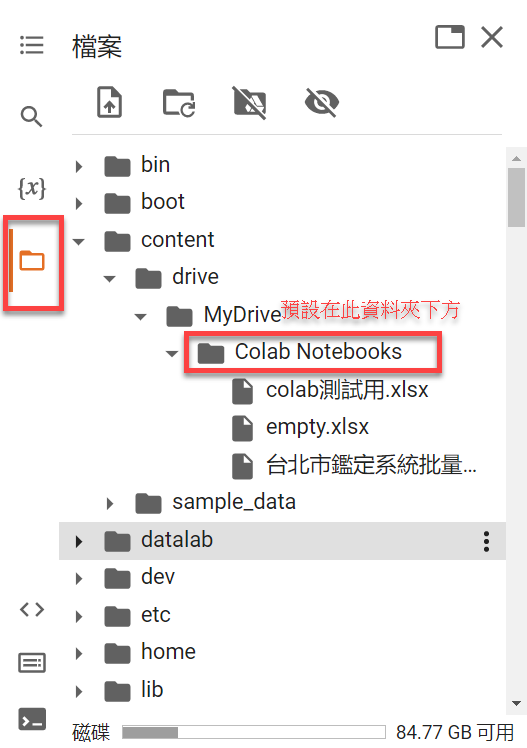